<a href="https://colab.research.google.com/github/shacharki/AweSimonSays/blob/main/ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('https://www.dropbox.com/scl/fi/03dh10e43jj17p5nvee3s/Moneyball2.csv?rlkey=4wov7qil5akvw3s9mv9v343ww&dl=1')


In [4]:
print(df.head())
print(df.info())

  League  Year    OBP    SLG     BA  Playoffs    G   OOBP   OSLG   RD
0     NL  2012  0.328  0.418  0.259         0  162  0.317  0.415   46
1     NL  2012  0.320  0.389  0.247         1  162  0.306  0.378  100
2     AL  2012  0.311  0.417  0.247         1  162  0.315  0.403    7
3     AL  2012  0.315  0.415  0.260         0  162  0.331  0.428  -72
4     NL  2012  0.302  0.378  0.240         0  162  0.335  0.424 -146
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   League    1232 non-null   object 
 1   Year      1232 non-null   int64  
 2   OBP       1232 non-null   float64
 3   SLG       1232 non-null   float64
 4   BA        1232 non-null   float64
 5   Playoffs  1232 non-null   int64  
 6   G         1232 non-null   int64  
 7   OOBP      420 non-null    float64
 8   OSLG      420 non-null    float64
 9   RD        1232 non-null   int64  
dtype

In [5]:
print("Missing values:")
print(df.isnull().sum())
#How many null values are in the dataframe?
print("sum null values: ",df.isnull().sum().sum())

Missing values:
League        0
Year          0
OBP           0
SLG           0
BA            0
Playoffs      0
G             0
OOBP        812
OSLG        812
RD            0
dtype: int64
sum null values:  1624


In [6]:
#replacing all null values with a value of 0
df.fillna(0,inplace=True)
print("after replacing: ",df.isnull().sum().sum())

after replacing:  0


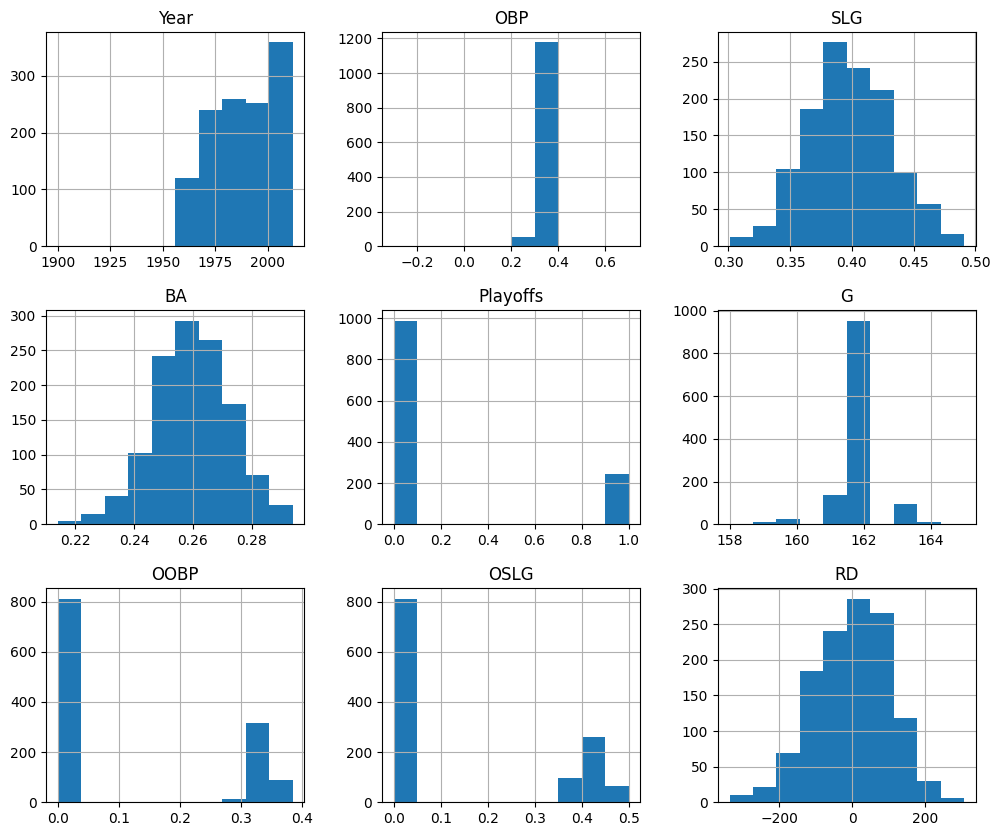

In [7]:
#distributions of the numerical features
df.hist(figsize=(12,10))
plt.show()

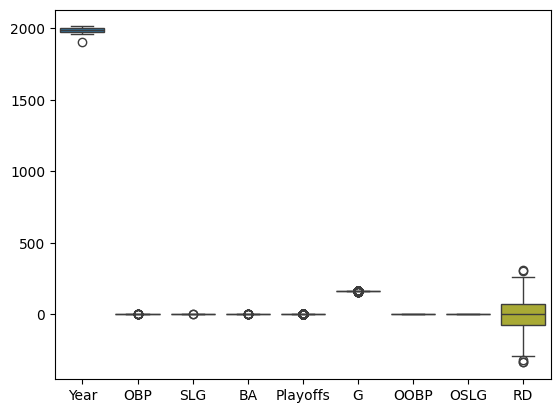

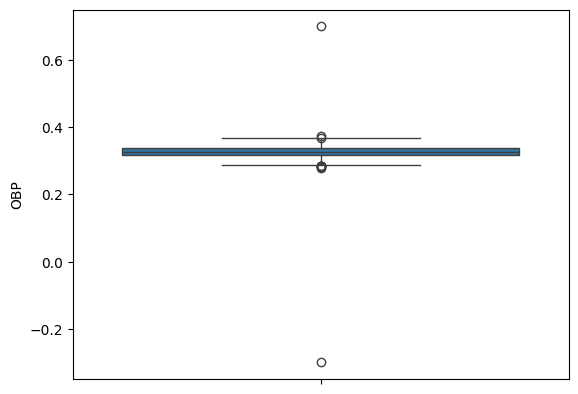

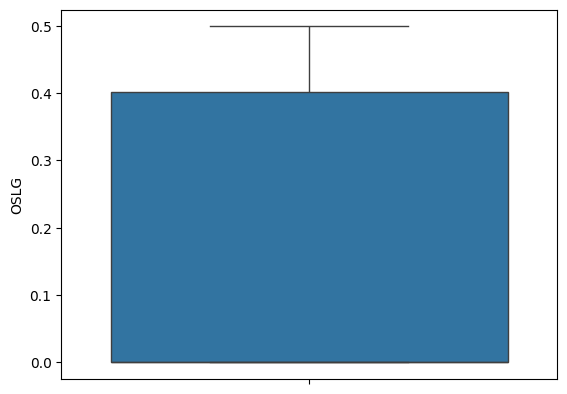

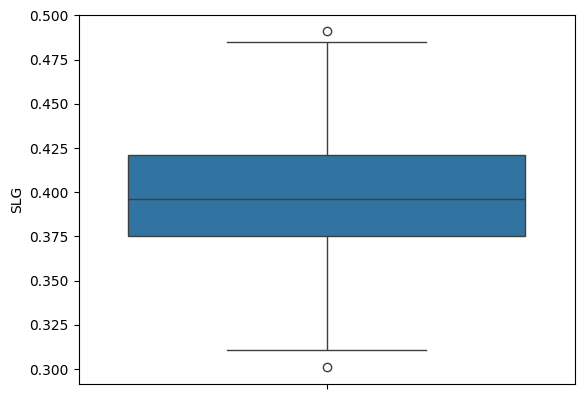

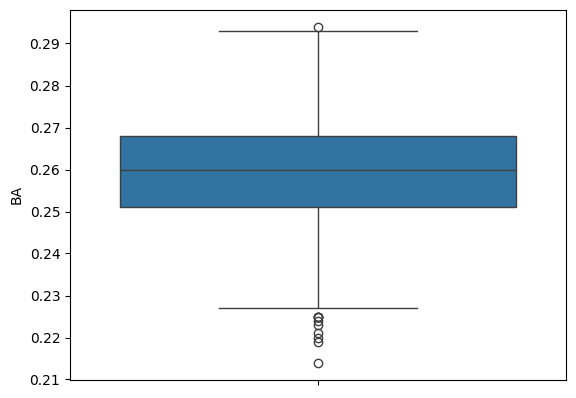

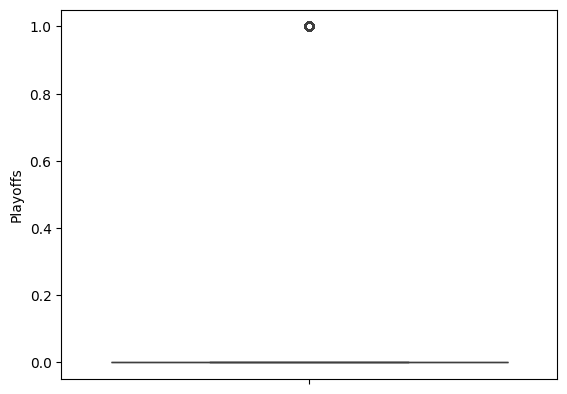

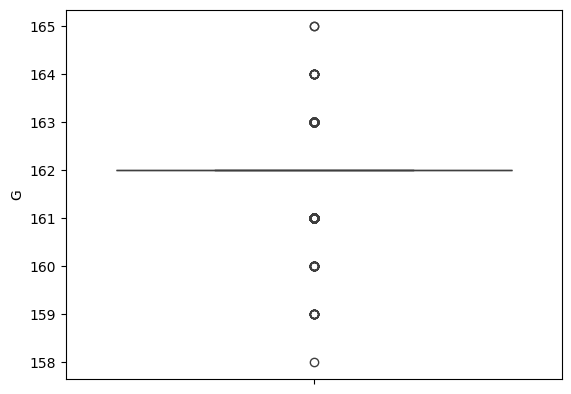

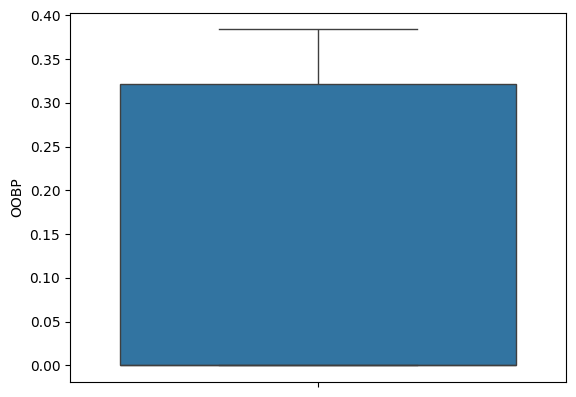

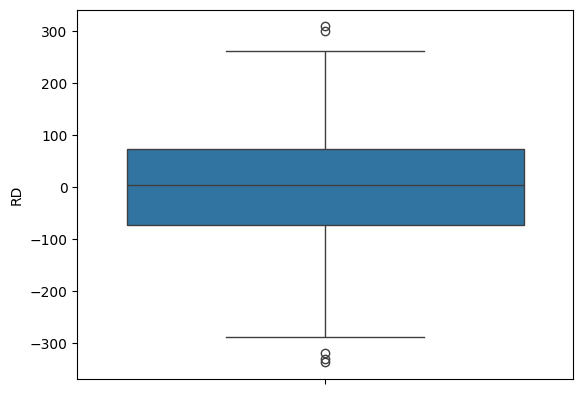

In [8]:
# Check for outliers
sns.boxplot(df)
plt.show()
featuresNumer = ['OBP','OSLG','SLG','BA','Playoffs','G','OOBP','RD']
for item in featuresNumer:
  sns.boxplot(df[item])
  plt.show()

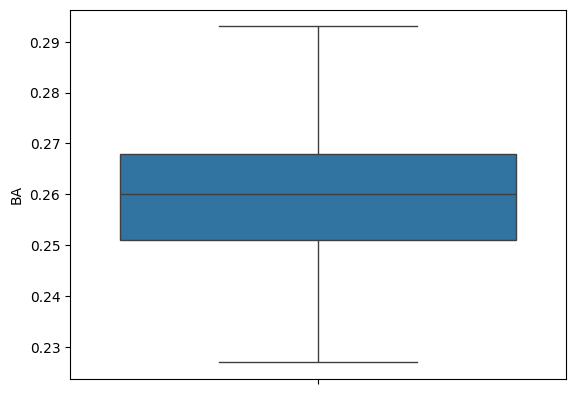

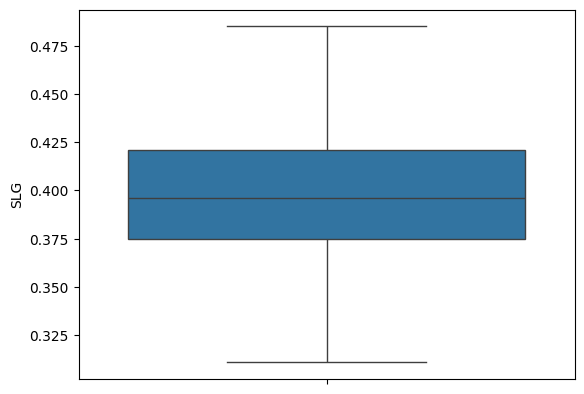

after removing outliers:  (1220, 10)


In [9]:
# Remove two outliers
two_outlier=['BA','SLG']
for item in two_outlier:
    Q1= df[item].quantile(0.25)
    Q3= df[item].quantile(0.75)
    IQR = Q3 -Q1
    lbound = Q1-1.5* IQR
    ubound= Q3+1.5 * IQR
    df =df.drop(df[(df[item]<lbound)| (df[item]>ubound)].index)
#after remove
for item in two_outlier:
  sns.boxplot(df[item])
  plt.show()
print("after removing outliers: ", df.shape)

In [10]:
#Identify the categorical features.
#Encode them to dummy variables
dfEncod =pd.get_dummies(df,columns=['League'])
print(dfEncod.head())

   Year    OBP    SLG     BA  Playoffs    G   OOBP   OSLG   RD  League_AL  \
0  2012  0.328  0.418  0.259         0  162  0.317  0.415   46          0   
1  2012  0.320  0.389  0.247         1  162  0.306  0.378  100          0   
2  2012  0.311  0.417  0.247         1  162  0.315  0.403    7          1   
3  2012  0.315  0.415  0.260         0  162  0.331  0.428  -72          1   
4  2012  0.302  0.378  0.240         0  162  0.335  0.424 -146          0   

   League_NL  
0          1  
1          1  
2          0  
3          0  
4          1  


In [11]:
#‘RD’ will serve as the column to predict (y)
X=dfEncod.drop( columns=['RD'])
y=dfEncod[ 'RD' ]

In [12]:
# Train/Test Split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:
#Standardize (Scale), use the pipeline
numeriFeatures =['OBP','SLG','BA','G','OOBP','OSLG']

preprocessor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), numeriFeatures)])

pipeline =Pipeline(steps=[('preprocessor',preprocessor)])

X_trainScale =pipeline.fit_transform(X_train)
X_testScale =pipeline.transform(X_test)
print("Shape of X_train after scale-", X_trainScale.shape)
print("Shape of X_test after scale-",X_testScale.shape)

Shape of X_train after scale- (976, 6)
Shape of X_test after scale- (244, 6)


In [14]:
model =LinearRegression()
model.fit(X_trainScale, y_train)
y_pred =model.predict(X_testScale)

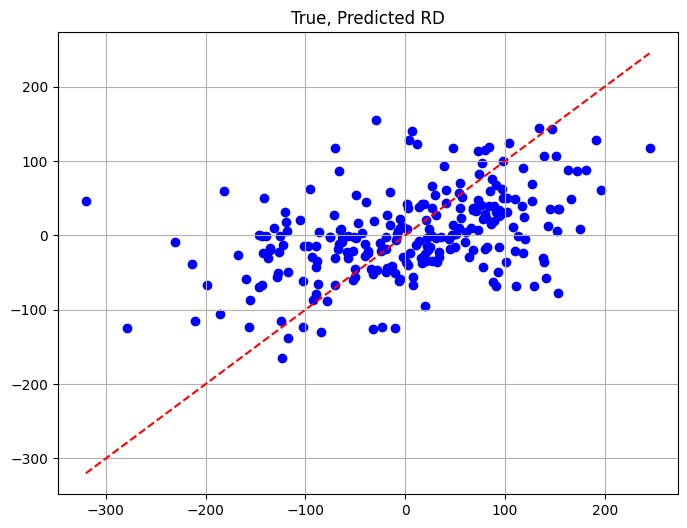

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],linestyle='--',color='red')
plt.title('True, Predicted RD')
plt.grid(True)
plt.show()

In [16]:
rmse =mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)

print("rmse-",rmse)
print("mae-",mae)

rmse- 87.2872234416922
mae- 68.58425709020933


In [17]:
X_cl= dfEncod.drop(columns=['Playoffs'])
y_cl =dfEncod['Playoffs']

X_train_cls,X_test_cls,y_train_cls,y_test_cls=train_test_split(X_cl,y_cl,test_size=0.2,random_state=42)
scaler_cls= StandardScaler()
X_train_scaled_cls=scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

In [18]:
print(df['Playoffs'].value_counts())


0    977
1    243
Name: Playoffs, dtype: int64


In [20]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train_scaled_cls, y_train_cls)

y_pred_cls =classifier.predict(X_test_scaled_cls)
conf_matrix= confusion_matrix(y_test_cls, y_pred_cls)
print("Conf Matrix- ",conf_matrix)

Conf Matrix-  [[187  10]
 [ 16  31]]


In [21]:
accuracy= accuracy_score(y_test_cls, y_pred_cls)
precision=precision_score(y_test_cls, y_pred_cls)
recall =recall_score(y_test_cls, y_pred_cls)
f1 =f1_score(y_test_cls, y_pred_cls)

print("\nAccuracy- ", accuracy)
print("Precision- ", precision)
print("Recall- ", recall)
print("F1-score- ", f1)


Accuracy-  0.8934426229508197
Precision-  0.7560975609756098
Recall-  0.6595744680851063
F1-score-  0.7045454545454545
